# Assignment 4

## About

Let's measure.

## Imports

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import numpy as np
import qiskit.quantum_info as qi

## Excercises

### 1

<b>a)</b> Construct a quantum circuit that produces the state $\ket \phi = \frac{1}{\sqrt 2} \big( \ket{000} + \ket{111} \big)$.


In [2]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.draw(reverse_bits=True)


┌───┐          
q_2: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_0: ──────────┤ X ├
               └───┘

In [3]:
psi = np.array(qi.Statevector(qc))

array_to_latex(psi)

<IPython.core.display.Latex object>

<b>b)</b> Is this state entangled?

Yes, this is a bell state with 3 qubits

<b>c)</b> Now add a partial standard measurement to the first qubit. Write down the corresponding measurement operator and compute the measurement probabilities and the expectation value.

In [4]:
M = np.eye(8) * np.array([0, 0, 1, 1, 0, 0, 1, 1])
array_to_latex(M)

<IPython.core.display.Latex object>

In [5]:
ket0 = np.array([[1,0]]).T
ket1 = np.array([[0,1]]).T

probability_000 = np.square(np.abs(np.kron(np.kron(ket0,ket0),ket0).T * psi))
print(probability_000)
probability_001 = np.square(np.abs(np.kron(np.kron(ket0,ket0),ket1).T * psi))
print(probability_001)
probability_010 = np.square(np.abs(np.kron(np.kron(ket0,ket1),ket0).T * psi))
print(probability_010)
probability_011 = np.square(np.abs(np.kron(np.kron(ket0,ket1),ket1).T * psi))
print(probability_011)
probability_100 = np.square(np.abs(np.kron(np.kron(ket1,ket0),ket0).T * psi))
print(probability_100)
probability_101 = np.square(np.abs(np.kron(np.kron(ket1,ket0),ket1).T * psi))
print(probability_101)
probability_110 = np.square(np.abs(np.kron(np.kron(ket1,ket1),ket0).T * psi))
print(probability_110)
probability_111 = np.square(np.abs(np.kron(np.kron(ket1,ket1),ket1).T * psi))
print(probability_111)

[[0.5 0.  0.  0.  0.  0.  0.  0. ]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.  0.  0.  0.  0.  0.  0.  0.5]]


In [6]:
expected = psi.T.conj() @ (M @ psi)
print(expected)

(0.4999999999999999+0j)


<b>d)</b> Run your circuit with 1000 shots and plot a histogram of the results. Does this match the probabilities you computed?

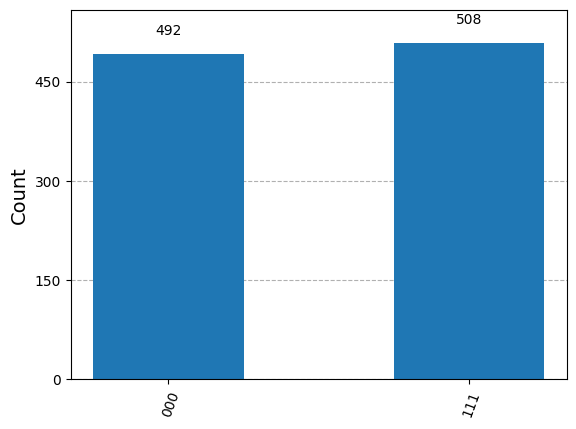

In [7]:
def measure(qc: QuantumCircuit, shots=1000):
    backend = AerSimulator()
    qc.measure_all()
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    return result.get_counts()

plot_histogram(measure(qc))

<b>e)</b> Suppose you measured the first qubit to be 0, what is the posterior state of the whole system? What would happen if you measure the other two qubits now?

If the first quibit is measured to be 0, then the two other quibits are measured as 0, thus the whole system will
always measure as 000

### 2

<b>a)</b> Construct a quantum circuit that produces the state $\ket \phi = \ket{\Psi^+} \otimes \ket{+R}$. Consider using *QuantumCircuit.append* for the task.

*Note:* If you wish to use array_to_latex to show the statevector, you may need to use the *max_size* hyperparameter.

In [8]:
qc = QuantumCircuit(4, 2)
qc.h(3)
qc.h(2)
qc.s(2)
qc.h(1)
qc.cx(1,0)
qc.barrier()
state_vect = qi.Statevector(qc)#.draw("latex")
state_vect.draw("latex")

<IPython.core.display.Latex object>

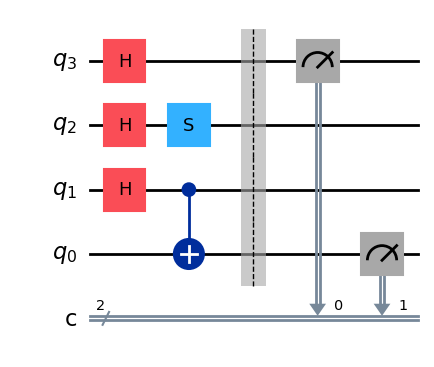

In [9]:
qc.measure(3, 0)
qc.measure(0, 1)
# print(qc)
qc.draw("mpl",reverse_bits=True, cregbundle=True)

<b>b)</b> Is this state entangled?

This state is not entangeled, as it can be decomposed into its two components given in a)

<b>c)</b> Now add a partial standard measurement to the first and last qubit. Write down the corresponding measurement operator and compute the measurement probabilities and the expectation value.

In [10]:
M = np.eye(np.pow(2, 4)) * np.array([1,2,1,2,1,2,1,2,3,4,3,4,3,4,3,4])
array_to_latex(M)

<IPython.core.display.Latex object>

In [11]:
psi = np.array(state_vect)
expected = psi.conj().T @ M @ psi
expected

np.complex128(2.4999999999999987+0j)

<b>d)</b> Run your circuit with 1000 shots and plot a histogram of the results. Does this match the probabilities you computed?

*Note:* if you used *.append()* to build your circuit, you might need to use *.decompose()* here.

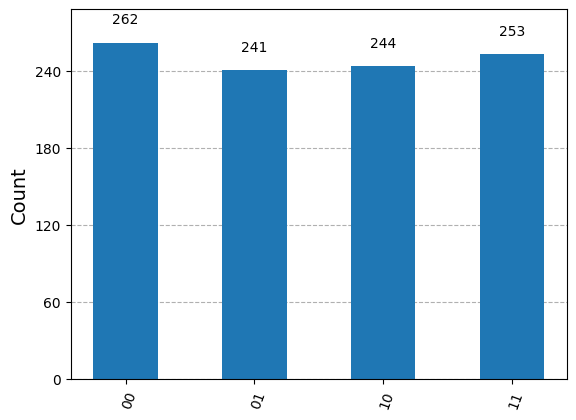

In [12]:
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=1000)
result = job.result()
plot_histogram(result.get_counts())

<b>e)</b> Suppose you measured the first qubit to be 0 and the last qubit to be 1, what is the posterior state of the whole system? What would happen if you measure the other two qubits now?

The posterior state of the whole system would be in a superposition between (sqrt(2) * i) / 4 * (|0011> + |0111>)